### Creation

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict


In [2]:
sample_imdb = defaultdict(list)
imdb_title = ["Guardians of the Galaxy", "Promettheus", "Split", "Sing", "Suicide Squad", "The Matrix", "The Lord of the Rings", "Harry Potter", "Star Wars", "Nine Lives"]
sample_imdb["Title"] = imdb_title
sample_imdb["Rank"] = [1,2,3,4,5,6,7,8,9,10]
genre = ["Action, Adventure, Sci-Fi","Adventure, Mystery, Sci-Fi", "Horror, Thriller", "Animation, Comedy, Family", "Action, Adventure, Fantacy", "Sci-Fi, Future", "Adventure, Fantacy", "Magic, Fantacy", "Adventure, War, Sci-Fi", "Comedy, Family, Fantacy"]
sample_imdb["Genre"]=genre
director = ["James Gunn", "Ridley Scott", "M. Night Shyamalan", "Christophe Lourdelet", "David Ayer", "Unkown", np.nan, "Unkown", None, "Unkown"]
sample_imdb["Director"]=director
rating = [8.1, 7.0, 7.3, 7.2, 6.2, 8.2, 9.0, 8.1, 8.2, 5.3]
sample_imdb["Rating"]=rating

# print(sample_imdb)
for k, v in sample_imdb.items():
  print(k, "(",len(v), ")", ": ", v)

Title ( 10 ) :  ['Guardians of the Galaxy', 'Promettheus', 'Split', 'Sing', 'Suicide Squad', 'The Matrix', 'The Lord of the Rings', 'Harry Potter', 'Star Wars', 'Nine Lives']
Rank ( 10 ) :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Genre ( 10 ) :  ['Action, Adventure, Sci-Fi', 'Adventure, Mystery, Sci-Fi', 'Horror, Thriller', 'Animation, Comedy, Family', 'Action, Adventure, Fantacy', 'Sci-Fi, Future', 'Adventure, Fantacy', 'Magic, Fantacy', 'Adventure, War, Sci-Fi', 'Comedy, Family, Fantacy']
Director ( 10 ) :  ['James Gunn', 'Ridley Scott', 'M. Night Shyamalan', 'Christophe Lourdelet', 'David Ayer', 'Unkown', nan, 'Unkown', None, 'Unkown']
Rating ( 10 ) :  [8.1, 7.0, 7.3, 7.2, 6.2, 8.2, 9.0, 8.1, 8.2, 5.3]


In [3]:
# df_imdb = pd.DataFrame(sample_imdb, columns=sample_imdb.keys())
df_imdb = pd.DataFrame(sample_imdb)

df_imdb.head()

,Title,Rank,Genre,Director,Rating
0,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1
1,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
2,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3
3,Sing,4,"Animation, Comedy, Family",Christophe Lourdelet,7.2
4,Suicide Squad,5,"Action, Adventure, Fantacy",David Ayer,6.2


In [4]:
# df_imdb.to_csv('sample_imdb.csv')
# df_imdb = pd.read_csv('sample_imdb.csv', index_col=0)
# df_imdb

### Creation

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series.

In [5]:
data = {
    "apples": [3,2,0,1],
    "oranges": [0, 4, 8, 3]
}
# Each (key, value) item in data corresponds to a column in the dataframe
purchases = pd.DataFrame(data)
# print(purchases)
purchases

,apples,oranges
0,3,0
1,2,4
2,0,8
3,1,3


In [6]:
purchases = pd.DataFrame(data, index=["A", "B", "C", "D"])
purchases

,apples,oranges
A,3,0
B,2,4
C,0,8
D,1,3


In [7]:
# locate an order by using the name
purchases.loc["A"]

apples     3
oranges    0
Name: A, dtype: int64

In [8]:
df_imdb.head(3)

,Title,Rank,Genre,Director,Rating
0,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1
1,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
2,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3


In [9]:
df_imdb.tail(3)

,Title,Rank,Genre,Director,Rating
7,Harry Potter,8,"Magic, Fantacy",Unkown,8.1
8,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2
9,Nine Lives,10,"Comedy, Family, Fantacy",Unkown,5.3


In [10]:
# df_imdb.set_index(df_imdb['Title'], inplace=True)
# df_imdb

In [11]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     10 non-null     object 
 1   Rank      10 non-null     int64  
 2   Genre     10 non-null     object 
 3   Director  8 non-null      object 
 4   Rating    10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes


### Drop Duplicates

Like `append()` (`temp_df = df_imdb.append(df_imdb)`), the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Using `inplace=True` will modify the DataFrame object in place.

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:
 - `first`: (default) Drop duplicates except for the first occurrence.
 - `last`: Drop duplicates except for the last occurrence.
 - `False`: Drop all duplicates.

In [12]:
df_imdb.shape

(10, 5)

In [13]:
temp_imdb = df_imdb.append(df_imdb)
temp_imdb.shape

(20, 5)

In [14]:
temp_imdb = temp_imdb.drop_duplicates(keep="first")
print(temp_imdb.shape)
temp_imdb['Rating'].values

(10, 5)


array([8.1, 7. , 7.3, 7.2, 6.2, 8.2, 9. , 8.1, 8.2, 5.3])

In [15]:
temp_imdb = df_imdb.append(df_imdb)
temp_imdb = temp_imdb.drop_duplicates(keep=False)
print(temp_imdb.shape)
temp_imdb['Rating'].values

(0, 5)


array([], dtype=float64)

### Cleaning Columns

In [16]:
df_imdb.columns

Index(['Title', 'Rank', 'Genre', 'Director', 'Rating'], dtype='object')

In [17]:
# rename() to rename certain or all columns via a dict
df_imdb.rename(columns={
    'Rank':'rank',
    'Rating': 'rating'
}, inplace=True)

# we could also set a list of names to the columns: df_imdb.columns=['rank', ....]
df_imdb.columns

Index(['Title', 'rank', 'Genre', 'Director', 'rating'], dtype='object')

In [18]:
# Or use a list comprehension
df_imdb.columns = [col.lower() for col in df_imdb]
df_imdb.columns

Index(['title', 'rank', 'genre', 'director', 'rating'], dtype='object')

### Missing Values

Missing or null values. Most commonly, Python's `None` or NumPy's `np.nan`.
Many options to deal with nulls, like:
- get rid of rows or columns with nulls
- Replace nulls with non-null values, a technique known as imputation (replace with mean, media, mode, etc.)

In [19]:
# check which cells in the dataframe are null
df_imdb.isnull()

,title,rank,genre,director,rating
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,False,True,False
9,False,False,False,False,False


In [20]:
# to count the number of nulls in each column we use an aggregate function for summing
df_imdb.isnull().sum()

title       0
rank        0
genre       0
director    2
rating      0
dtype: int64

In [21]:
# removing null data if you have a small amount of missing data
df_null_removed = df_imdb.dropna()
print(df_imdb.shape)
print(df_null_removed.shape)

(10, 5)
(8, 5)


In [22]:
# Other than dropping rows, you can also drop columns with null values by setting axis=1
temp_imdb = df_imdb.dropna(axis=1)
print(df_imdb.shape)
print(temp_imdb.shape)

(10, 5)
(10, 4)


In [23]:
df_imdb.columns

Index(['title', 'rank', 'genre', 'director', 'rating'], dtype='object')

In [24]:
# replacing null with other values
temp_imdb = df_imdb.fillna("filled")
print(temp_imdb.isnull().sum())
temp_imdb.tail()

title       0
rank        0
genre       0
director    0
rating      0
dtype: int64


,title,rank,genre,director,rating
5,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
6,The Lord of the Rings,7,"Adventure, Fantacy",filled,9.0
7,Harry Potter,8,"Magic, Fantacy",Unkown,8.1
8,Star Wars,9,"Adventure, War, Sci-Fi",filled,8.2
9,Nine Lives,10,"Comedy, Family, Fantacy",Unkown,5.3


### Describe

In [25]:
df_imdb.describe()

,rank,rating
count,10.00000,10.000000
mean,5.50000,7.460000
std,3.02765,1.097674
min,1.00000,5.300000
25%,3.25000,7.050000
50%,5.50000,7.700000
75%,7.75000,8.175000
max,10.00000,9.000000


In [26]:
df_imdb['rating'].describe()

count    10.000000
mean      7.460000
std       1.097674
min       5.300000
25%       7.050000
50%       7.700000
75%       8.175000
max       9.000000
Name: rating, dtype: float64

In [27]:
# describe can also be used on a categorical variable to get the count of rows, unique 
# count of categories, tp category, and freq of top category
df_imdb['genre'].describe()

count                            10
unique                           10
top       Action, Adventure, Sci-Fi
freq                              1
Name: genre, dtype: object

In [28]:
df_imdb['director'].describe()

count          8
unique         6
top       Unkown
freq           3
Name: director, dtype: object

In [29]:
df_imdb['director'].value_counts().head(4)

Unkown                3
James Gunn            1
Ridley Scott          1
M. Night Shyamalan    1
Name: director, dtype: int64

### Relationships between continuous various

In [30]:
df_imdb.corr()

,rank,rating
rank,1.00000,-0.09027
rating,-0.09027,1.00000


### DataFrame slicing, selecting, extracting

In [35]:
print(type(df_imdb['rating']))
print(type(df_imdb[['rating']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,title,rank,genre,director,rating
title,,,,,
Guardians of the Galaxy,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
Split,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3
Sing,Sing,4,"Animation, Comedy, Family",Christophe Lourdelet,7.2
Suicide Squad,Suicide Squad,5,"Action, Adventure, Fantacy",David Ayer,6.2
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
The Lord of the Rings,The Lord of the Rings,7,"Adventure, Fantacy",NaN,9.0
Harry Potter,Harry Potter,8,"Magic, Fantacy",Unkown,8.1
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2


In [39]:
df_imdb.set_index(df_imdb['title'], inplace=True)
df_imdb[['title', 'rating', 'director']]

,title,rating,director
title,,,
Guardians of the Galaxy,Guardians of the Galaxy,8.1,James Gunn
Promettheus,Promettheus,7.0,Ridley Scott
Split,Split,7.3,M. Night Shyamalan
Sing,Sing,7.2,Christophe Lourdelet
Suicide Squad,Suicide Squad,6.2,David Ayer
The Matrix,The Matrix,8.2,Unkown
The Lord of the Rings,The Lord of the Rings,9.0,NaN
Harry Potter,Harry Potter,8.1,Unkown
Star Wars,Star Wars,8.2,None


In [40]:
# For rows: loc (locates by name), or .iloc (locate by numerical index)
df_imdb.loc['Star Wars']

title                    Star Wars
rank                             9
genre       Adventure, War, Sci-Fi
director                      None
rating                         8.2
Name: Star Wars, dtype: object

In [41]:
df_imdb.loc[['Star Wars', 'The Matrix']]

,title,rank,genre,director,rating
title,,,,,
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2


In [42]:
df_imdb.iloc[0]

title         Guardians of the Galaxy
rank                                1
genre       Action, Adventure, Sci-Fi
director                   James Gunn
rating                            8.1
Name: Guardians of the Galaxy, dtype: object

In [44]:
df_imdb.loc['The Matrix':'Star Wars']

,title,rank,genre,director,rating
title,,,,,
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
The Lord of the Rings,The Lord of the Rings,7,"Adventure, Fantacy",NaN,9.0
Harry Potter,Harry Potter,8,"Magic, Fantacy",Unkown,8.1
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2


In [45]:
df_imdb.iloc[5:9]
# index 9 is not included

,title,rank,genre,director,rating
title,,,,,
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
The Lord of the Rings,The Lord of the Rings,7,"Adventure, Fantacy",NaN,9.0
Harry Potter,Harry Potter,8,"Magic, Fantacy",Unkown,8.1
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2


In [46]:
df_imdb[df_imdb['rating']==8.2]

,title,rank,genre,director,rating
title,,,,,
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2


In [47]:
df_imdb[df_imdb['rating']>=7].head()

,title,rank,genre,director,rating
title,,,,,
Guardians of the Galaxy,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
Split,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3
Sing,Sing,4,"Animation, Comedy, Family",Christophe Lourdelet,7.2
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2


In [ ]:
df_imdb[(df_imdb['rating']>=7) & (df_imdb['rank']<=3)]

,title,rank,genre,director,rating
Title,,,,,
Guardians of the Galaxy,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
Split,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3


In [48]:
df_imdb[df_imdb['rating'].isin([8.2, 7.0])]

,title,rank,genre,director,rating
title,,,,,
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0
The Matrix,The Matrix,6,"Sci-Fi, Future",Unkown,8.2
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2


In [53]:
# movies that have a rank above 8, director is not Unknown, and ratingn above the 50th percentile
df_imdb[(df_imdb['rank'] > 8) & (df_imdb['director'] != 'Unkown')
& (df_imdb['rating'] > df_imdb['rating'].quantile(0.5))]

,title,rank,genre,director,rating,rating_desc,desc2_rating
title,,,,,,,
Star Wars,Star Wars,9,"Adventure, War, Sci-Fi",None,8.2,good,good


### Applying functions


In [49]:
def rating_desc(x):
  if x >= 8.0:
    return "good"
  else:
    return "bad"

In [50]:
df_imdb['rating_desc'] = df_imdb['rating'].apply(rating_desc)
df_imdb.head()

,title,rank,genre,director,rating,rating_desc
title,,,,,,
Guardians of the Galaxy,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1,good
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0,bad
Split,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3,bad
Sing,Sing,4,"Animation, Comedy, Family",Christophe Lourdelet,7.2,bad
Suicide Squad,Suicide Squad,5,"Action, Adventure, Fantacy",David Ayer,6.2,bad


In [51]:
df_imdb['desc2_rating']=df_imdb['rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad')
df_imdb.head()

,title,rank,genre,director,rating,rating_desc,desc2_rating
title,,,,,,,
Guardians of the Galaxy,Guardians of the Galaxy,1,"Action, Adventure, Sci-Fi",James Gunn,8.1,good,good
Promettheus,Promettheus,2,"Adventure, Mystery, Sci-Fi",Ridley Scott,7.0,bad,bad
Split,Split,3,"Horror, Thriller",M. Night Shyamalan,7.3,bad,bad
Sing,Sing,4,"Animation, Comedy, Family",Christophe Lourdelet,7.2,bad,bad
Suicide Squad,Suicide Squad,5,"Action, Adventure, Fantacy",David Ayer,6.2,bad,bad


### Brief Plotting


In [55]:
import matplotlib.pyplot as plt

In [56]:
plt.rcParams.update({'font.size': 20, 
                     'figure.figsize': (10,8)})
# set font and plot size to be larger

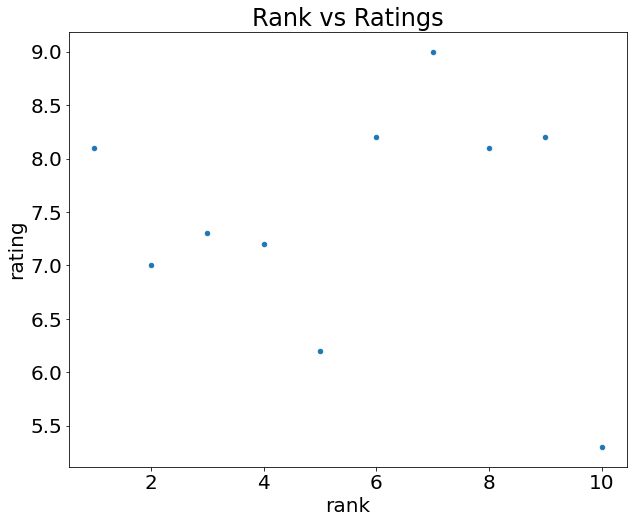

In [60]:
df_imdb.plot(kind='scatter', x='rank', y='rating', title='Rank vs Ratings');

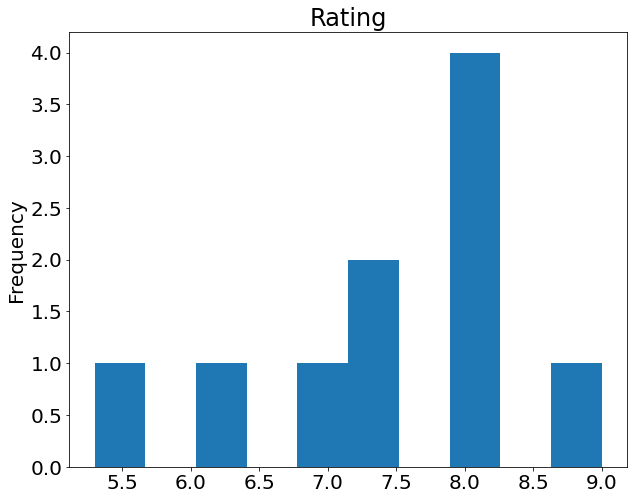

In [59]:
df_imdb['rating'].plot(kind='hist', title='Rating');

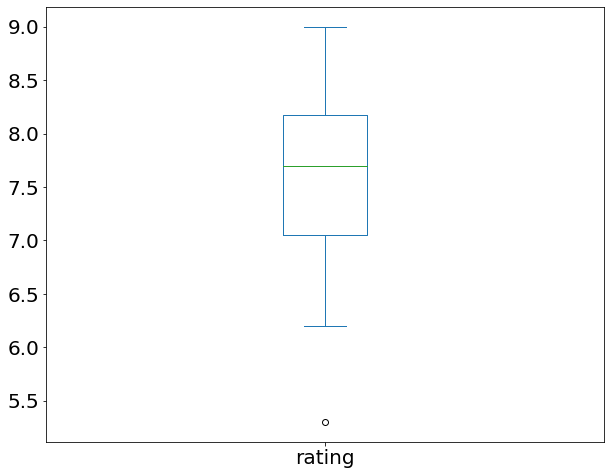

In [61]:
df_imdb['rating'].plot(kind='box');

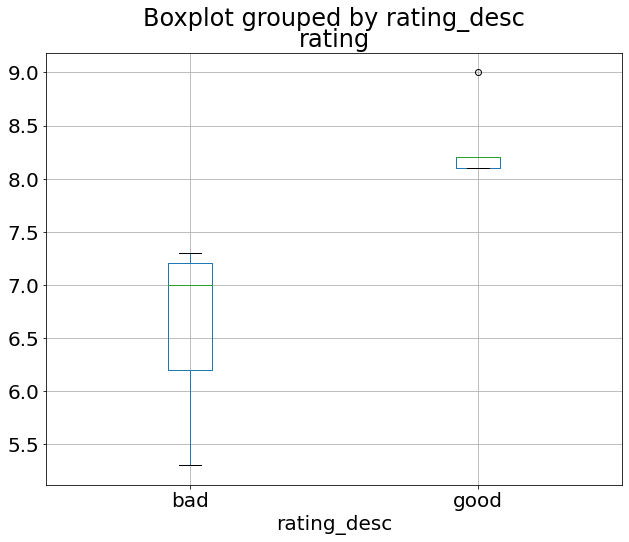

In [62]:
df_imdb.boxplot(column='rating', by='rating_desc');

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_data = load_boston()
print(type(boston_data))

In [ ]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
